In [6]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import numpy as np

In [7]:
# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

In [9]:
# Apply gates in order: X, Y, Z, H, S, T
qc.x(0)  # X gate
qc.y(0)  # Y gate
qc.z(0)  # Z gate
qc.h(0)  # Hadamard gate
qc.s(0)  # S gate
qc.t(0)  # T gate

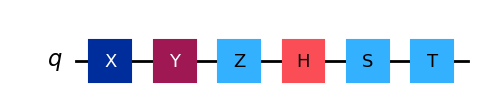

In [10]:
# Draw the circuit
qc.draw('mpl')

In [11]:
# Define the gates as mentioned
def apply_gate(state, gate):
    return np.dot(gate, state)

# Define the gates as matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
S = np.array([[1, 0], [0, 1j]])
T = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]])

# Start with the |0> state
initial_state = np.array([[1], [0]])

# Apply the operations sequentially on the state vector
state = apply_gate(initial_state, X)
state = apply_gate(state, Y)
state = apply_gate(state, Z)
state = apply_gate(state, H)
state = apply_gate(state, S)
state = apply_gate(state, T)

# Display the resultant state vector
resultant_state = state
resultant_state

array([[0. -0.70710678j],
       [0.5+0.5j       ]])

In [12]:
# Define R = HSH
R = np.dot(H, np.dot(S, H))

# Calculate R applied to |0>
R_on_0 = apply_gate(initial_state, R)
R_on_0  # Result of R applied to |0>

array([[0.5+0.5j],
       [0.5-0.5j]])

In [13]:
# Function to sample based on probabilities
def sample_from_state(state, num_samples):
    probabilities = np.abs(state.flatten())**2
    outcomes = np.array([0, 1])
    return np.random.choice(outcomes, size=num_samples, p=probabilities)

# Sample 10,000 times
num_samples = 10000
samples = sample_from_state(state, num_samples)

# Count the results
counts = {0: np.sum(samples == 0), 1: np.sum(samples == 1)}
counts

{0: 4958, 1: 5042}

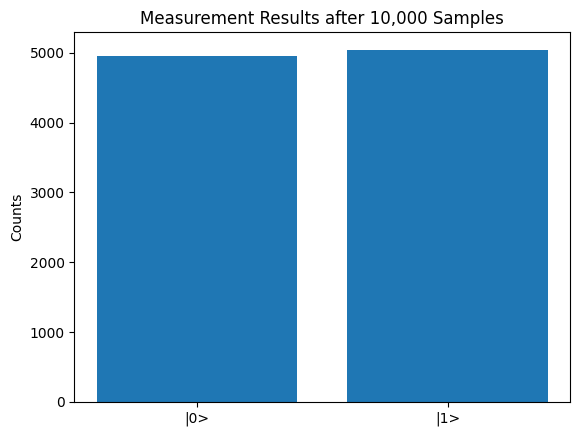

In [14]:
import matplotlib.pyplot as plt

# Plot the results
labels = ['|0>', '|1>']
values = [counts[0], counts[1]]

plt.bar(labels, values)
plt.title('Measurement Results after 10,000 Samples')
plt.ylabel('Counts')
plt.show()